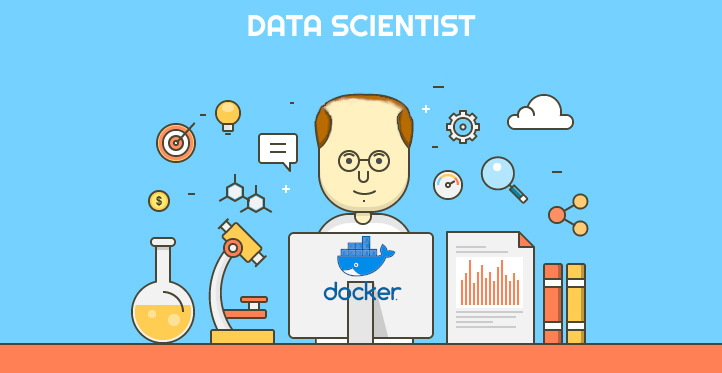

# Análise de Cluster

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import datasets

%matplotlib inline
rcParams['figure.figsize'] = 7, 4
sns.set_style('whitegrid')

## K-Means
Algorítmo não supervisionado usado para predição de grupos sem identificação

Predições baseadas em: número de centróides (grupos) presentes (k) e os valores médios mais próximos (distância Euclidiana entre as observações). É necessário colocar os dados em escala e olhar o Scatterplot para estimar o número de centróide, definindo assim o valor do parâmetro k no modelo.

Lembrar que **Precisão** (precision) é a medida de relevância do modelo e **Revocação** (recall) é a medida da completude do modelo.

In [2]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

In [3]:
# Dados
iris = datasets.load_iris()

X = scale(iris.data)
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
variable_names = iris.feature_names
iris_df = pd.DataFrame(iris.data)
iris_df.columns = variable_names

In [4]:
# Construir o Modelo
clustering = KMeans(n_clusters=3, random_state=5).fit(X)
clustering

KMeans(n_clusters=3, random_state=5)

Text(0.5, 1.0, 'Resultado KMeans')

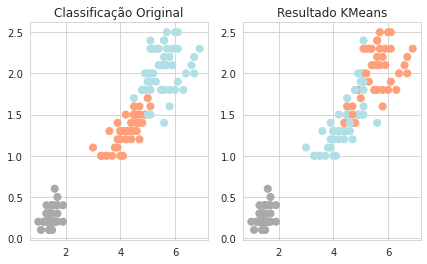

In [5]:
# Visualizar no gráfico
cores = np.array(['darkgray', 'lightsalmon', 'powderblue'])
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

plt.subplot(1, 2, 1) # lin, col, index
plt.scatter(x=iris_df['petal length (cm)'], 
            y=iris_df['petal width (cm)'], 
            c=cores[iris.target], s=50)
plt.title('Classificação Original')

plt.subplot(1, 2, 2) # lin, col, index
plt.scatter(x=iris_df['petal length (cm)'], 
            y=iris_df['petal width (cm)'], 
            c=cores[relabel], s=50)
plt.title('Resultado KMeans')

In [6]:
# Avaliação da clusterização
metricas = classification_report(y, relabel)
print(metricas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.23      0.22      0.23        50
           2       0.26      0.28      0.27        50

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.50      0.50       150



## Clusterização Hierárquica
Predizem subgrupo dentro de dados encontrando a distância entre cada ponto e seus vizinhos mais próximos e conectando os vizinhos. É necessário encontrar o número de subgrupos com o auxílio de um Dendograma.

**Dendrograma** é um gráfico em formato de árvore que mostra visualmente taxonomias, linhagens e relacionamentos entre as observações.

**Métricas de Distância** são utilizados os formatos: Euclidian, Manhattan ou Cosine e **Parâmtros de Conexão** podem ser: Ward, Complete ou Avarage. Modo de seleção é por tentativa e erro.

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

In [12]:
# Parâmetros
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))

# Base de dados
carros = pd.read_csv('bases/mtcars.csv')
carros.columns = ['nome', 'mpg', 'cil', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

# Com base em: consumo de gasolina, medida do poder do carro, horse power e peso.
X = carros[['mpg', 'disp','hp', 'wt']].values
# Inferir se o carro é automático ou manual?
y = carros['am'].values

carros.head()

,nome,mpg,cil,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Figure size 720x216 with 0 Axes>

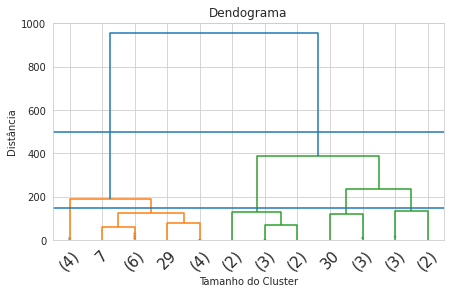

In [11]:
# Scipy para dendogramas
z = linkage(X, 'ward')
dendrogram(z, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=15, show_contracted=True)

plt.title('Dendograma')
plt.xlabel('Tamanho do Cluster')
plt.ylabel('Distância')
plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

In [17]:
# Gerar Clusters Hierárquicos
k = 2

hclusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(X)
print('Método 1:', accuracy_score(y, hclusters.labels_))

hclusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete').fit(X)
print('Método 2:', accuracy_score(y, hclusters.labels_))

hclusters = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average').fit(X)
print('Método 3:', accuracy_score(y, hclusters.labels_))

hclusters = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='single').fit(X)
print('Método 4:', accuracy_score(y, hclusters.labels_))

hclusters = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='complete').fit(X)
print('Método 5:', accuracy_score(y, hclusters.labels_))

hclusters = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average').fit(X)
print('Método 6:', accuracy_score(y, hclusters.labels_))

hclusters = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='single').fit(X)
print('Método 7:', accuracy_score(y, hclusters.labels_))

hclusters = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='complete').fit(X)
print('Método 8:', accuracy_score(y, hclusters.labels_))

hclusters = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='average').fit(X)
print('Método 9:', accuracy_score(y, hclusters.labels_))

Método 1: 0.78125
Método 2: 0.4375
Método 3: 0.78125
Método 4: 0.625
Método 5: 0.71875
Método 6: 0.71875
Método 7: 0.3125
Método 8: 0.28125
Método 9: 0.1875


## Classificação KNN
É um classificador supervisionado que decora observações de um conjunto de teste identificado para predizer a identificação de novas observações. Faz predições com base em quão similares as observações de treino são em relação às novas observações. Quanto mais similares os valores, mais provável é que uma nova observação tenha o mesmo identificador.

Evitar de usar em conjuntos grandes pois é um processo demorado.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [19]:
# Colocar os dados em escala
X = preprocessing.scale(X)

# Dividir os dados em teste e treino
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.33, random_state=17)

In [20]:
# Treinar o modelo
clf = KNeighborsClassifier()
clf.fit(X_treino, y_treino)

print(clf)

KNeighborsClassifier()


In [21]:
# Avaliar o Desempenho
y_esperado = y_teste
y_predito = clf.predict(X_teste)

print(classification_report(y_esperado, y_predito))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.67      0.80         6

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11

